In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
# set seed for reproducibility
np.random.seed(1111)

In [3]:
# Read the dataset
# Define the file path
file_path = r"C:\Users\user\DSC\Zindi-competitions-data\Traffic_jam_mvt_Nrb_data\train_revised.csv"

# Read the CSV file 
df = pd.read_csv(file_path)

# view the head of the dataset
df.head()

ride_id seat_number payment_method payment_receipt travel_date travel_time  \
0     1442         15A          Mpesa      UZUEHCBUSO    17-10-17        7:15   
1     5437         14A          Mpesa      TIHLBUSGTE    19-11-17        7:12   
2     5710          8B          Mpesa      EQX8Q5G19O    26-11-17        7:05   
3     5777         19A          Mpesa      SGP18CL0ME    27-11-17        7:10   
4     5778         11A          Mpesa      BM97HFRGL9    27-11-17        7:12   

  travel_from travel_to car_type  max_capacity  
0      Migori   Nairobi      Bus            49  
1      Migori   Nairobi      Bus            49  
2      Keroka   Nairobi      Bus            49  
3    Homa Bay   Nairobi      Bus            49  
4      Migori   Nairobi      Bus            49

In [4]:
# data missing in the training set
file_path_1 = r"C:\Users\user\DSC\Zindi-competitions-data\Traffic_jam_mvt_Nrb_data\test_questions.csv"
df_1 = pd.read_csv(file_path_1)
df_1.head()

ride_id travel_date travel_time travel_from travel_to car_type  \
0      247  2018-05-07       07:06       Kisii   Nairobi      Bus   
1      256  2018-05-06       11:08       Kisii   Nairobi  shuttle   
2      275  2018-05-04       05:00       Kisii   Nairobi  shuttle   
3      285  2018-05-04       09:10       Kisii   Nairobi  shuttle   
4      286  2018-05-04       09:20       Kisii   Nairobi  shuttle   

   max_capacity  
0            49  
1            11  
2            11  
3            11  
4            11

In [13]:
# these are the missing entries in the submission file
missing_rows = df_1.iloc[0:5]
missing_rows

ride_id travel_date travel_time travel_from travel_to car_type  \
0      247  2018-05-07       07:06       Kisii   Nairobi      Bus   
1      256  2018-05-06       11:08       Kisii   Nairobi  shuttle   
2      275  2018-05-04       05:00       Kisii   Nairobi  shuttle   
3      285  2018-05-04       09:10       Kisii   Nairobi  shuttle   
4      286  2018-05-04       09:20       Kisii   Nairobi  shuttle   

   max_capacity  
0            49  
1            11  
2            11  
3            11  
4            11

In [16]:
# randomly sample the seat number from the first dataframe
seat_number = np.array(df['seat_number'].sample(5))

# including the seat_number column into the missing_rows
missing_rows['seat_number'] = seat_number
missing_rows

C:\Users\user\AppData\Local\Temp\ipykernel_47556\4117566604.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_rows['seat_number'] = seat_number


ride_id travel_date travel_time travel_from travel_to car_type  \
0      247  2018-05-07       07:06       Kisii   Nairobi      Bus   
1      256  2018-05-06       11:08       Kisii   Nairobi  shuttle   
2      275  2018-05-04       05:00       Kisii   Nairobi  shuttle   
3      285  2018-05-04       09:10       Kisii   Nairobi  shuttle   
4      286  2018-05-04       09:20       Kisii   Nairobi  shuttle   

   max_capacity seat_number  
0            49           8  
1            11         11B  
2            11         15B  
3            11          6B  
4            11         18A

In [18]:
# add the missing_rows to the dataframe
df = pd.concat([df, missing_rows], axis=0, ignore_index=True)
df = df.fillna({'payment_method': 'Mpesa', 'payment_receipt': 'Mpesa'})
df.head()

ride_id seat_number payment_method payment_receipt travel_date travel_time  \
0     1442         15A          Mpesa      UZUEHCBUSO    17-10-17        7:15   
1     5437         14A          Mpesa      TIHLBUSGTE    19-11-17        7:12   
2     5710          8B          Mpesa      EQX8Q5G19O    26-11-17        7:05   
3     5777         19A          Mpesa      SGP18CL0ME    27-11-17        7:10   
4     5778         11A          Mpesa      BM97HFRGL9    27-11-17        7:12   

  travel_from travel_to car_type  max_capacity  
0      Migori   Nairobi      Bus            49  
1      Migori   Nairobi      Bus            49  
2      Keroka   Nairobi      Bus            49  
3    Homa Bay   Nairobi      Bus            49  
4      Migori   Nairobi      Bus            49

### EXLORATORY DATA ANALYSIS

In [19]:
# Checking the dimensions of the dataframe
df.shape

(51655, 10)

The dataset has 51655 rows and 10 columns

In [22]:
# Checking for null values in the dataset
df.isna().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

The dataframe has no missing values.

In [23]:
# View the number of passengers travelling from each region.
df['travel_from'].value_counts()

travel_from
Kisii        22617
Migori        7027
Homa Bay      6304
Sirare        4449
Rongo         3928
Kehancha      1909
Awendo        1788
Kijauri       1031
Keroka         988
Nyachenge      512
Rodi           405
Mbita          378
Ndhiwa         236
Sori            55
Keumbu          22
Oyugis           5
Kendu Bay        1
Name: count, dtype: int64

In [24]:
# viewing the destinations of the passengers for consistency
df['travel_to'].value_counts()

travel_to
Nairobi    51655
Name: count, dtype: int64

This confirms that the destination for all the passengers in the dataframe is Nairobi.

In [25]:
# Viewing the payment methods used
df['payment_method'].value_counts()

payment_method
Mpesa    51542
Cash       113
Name: count, dtype: int64

Let us now explore the datatypes of the dataframe for uniformity


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51655 entries, 0 to 51654
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51655 non-null  int64 
 1   seat_number      51655 non-null  object
 2   payment_method   51655 non-null  object
 3   payment_receipt  51655 non-null  object
 4   travel_date      51655 non-null  object
 5   travel_time      51655 non-null  object
 6   travel_from      51655 non-null  object
 7   travel_to        51655 non-null  object
 8   car_type         51655 non-null  object
 9   max_capacity     51655 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


We now change the two columns travel time and date into datetime data types as well as drop `['travel_to', 'payment_receipt']` columns since they do not contain any useful information.

In [28]:
# converting the ["travel_date","travel_time"] columns into datetime data type
df['travel_time'] = pd.to_datetime(df['travel_date'] + ' ' + df['travel_time'], format='mixed')

# Dropping the original travel_date column if necessary
df = df.drop(columns=['travel_date'])

# drop the travel_to and payment receipt features since they do not contain any valuable information
df.drop(columns=['travel_to', 'payment_receipt'], inplace=True)
df.head()

ride_id seat_number payment_method         travel_time travel_from  \
0     1442         15A          Mpesa 2017-10-17 07:15:00      Migori   
1     5437         14A          Mpesa 2017-11-19 07:12:00      Migori   
2     5710          8B          Mpesa 2017-11-26 07:05:00      Keroka   
3     5777         19A          Mpesa 2017-11-27 07:10:00    Homa Bay   
4     5778         11A          Mpesa 2017-11-27 07:12:00      Migori   

  car_type  max_capacity  
0      Bus            49  
1      Bus            49  
2      Bus            49  
3      Bus            49  
4      Bus            49

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51655 entries, 0 to 51654
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ride_id         51655 non-null  int64         
 1   seat_number     51655 non-null  object        
 2   payment_method  51655 non-null  object        
 3   travel_time     51655 non-null  datetime64[ns]
 4   travel_from     51655 non-null  object        
 5   car_type        51655 non-null  object        
 6   max_capacity    51655 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 2.8+ MB


In [30]:
# store the ride_id for submission file
ride_id = df['ride_id']

# checking the number of entries according to ride id
df['ride_id'].value_counts()

ride_id
8454     50
11382    49
10834    49
8090     49
13211    49
         ..
9384      1
12408     1
9385      1
9388      1
1442      1
Name: count, Length: 6254, dtype: int64

### Feature Engineering

In [31]:
# Generate a new feature 'yr_quarter' indicating the quarter of the year
df['yr_quarter'] = df['travel_time'].dt.quarter

# Extract the day of the week from the travel_time column
df['day_of_wk'] = df['travel_time'].dt.day_name()

df.head()

ride_id seat_number payment_method         travel_time travel_from  \
0     1442         15A          Mpesa 2017-10-17 07:15:00      Migori   
1     5437         14A          Mpesa 2017-11-19 07:12:00      Migori   
2     5710          8B          Mpesa 2017-11-26 07:05:00      Keroka   
3     5777         19A          Mpesa 2017-11-27 07:10:00    Homa Bay   
4     5778         11A          Mpesa 2017-11-27 07:12:00      Migori   

  car_type  max_capacity  yr_quarter day_of_wk  
0      Bus            49           4   Tuesday  
1      Bus            49           4    Sunday  
2      Bus            49           4    Sunday  
3      Bus            49           4    Monday  
4      Bus            49           4    Monday

Different quarters of the year tend to have different travel patterns and thus may contribute in the prediction.

Let us now create the target column to show the number of tickets booked for each `"ride_id"`

In [32]:
# Create a new column 'Tickets' to indicate the value counts for each ride_id
df['Tickets'] = df.groupby('ride_id')['ride_id'].transform('size')

df.head()

ride_id seat_number payment_method         travel_time travel_from  \
0     1442         15A          Mpesa 2017-10-17 07:15:00      Migori   
1     5437         14A          Mpesa 2017-11-19 07:12:00      Migori   
2     5710          8B          Mpesa 2017-11-26 07:05:00      Keroka   
3     5777         19A          Mpesa 2017-11-27 07:10:00    Homa Bay   
4     5778         11A          Mpesa 2017-11-27 07:12:00      Migori   

  car_type  max_capacity  yr_quarter day_of_wk  Tickets  
0      Bus            49           4   Tuesday        1  
1      Bus            49           4    Sunday        1  
2      Bus            49           4    Sunday        1  
3      Bus            49           4    Monday        5  
4      Bus            49           4    Monday       31

### Visualization and Preprocessing

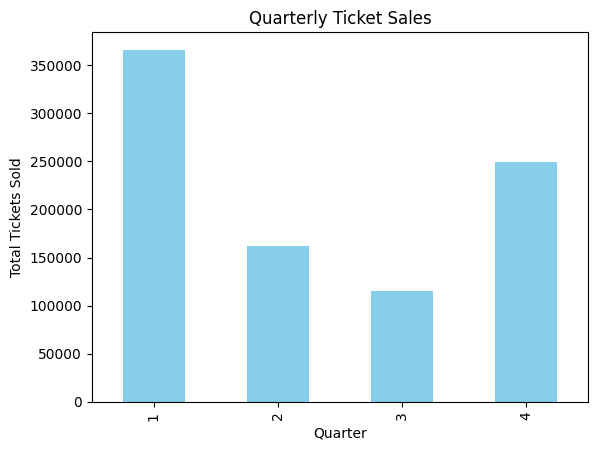

In [33]:
quarter_sales = df.groupby('yr_quarter')['Tickets'].sum()

# Bar Plot
quarter_sales.plot(kind='bar', color='skyblue', title='Quarterly Ticket Sales')
plt.xlabel('Quarter')
plt.ylabel('Total Tickets Sold')
plt.show()


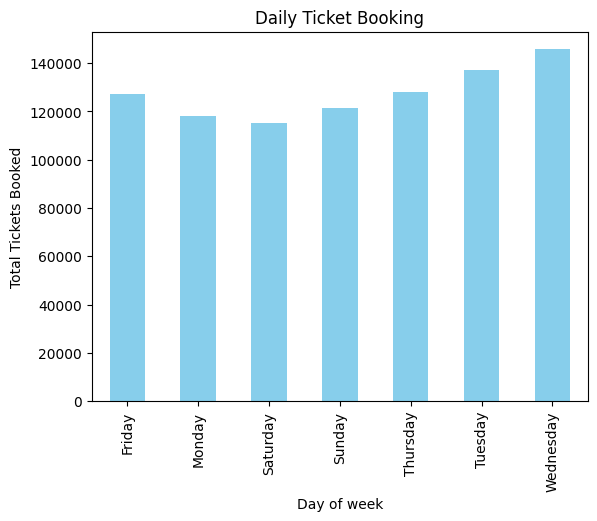

In [34]:
daily_sales = df.groupby('day_of_wk')['Tickets'].sum()

# Bar Plot
daily_sales.plot(kind='bar', color='skyblue', title='Daily Ticket Booking')
plt.xlabel('Day of week')
plt.ylabel('Total Tickets Booked')
plt.show()


Most tickets are sold in the first quarter of the year, followed by the fourth quarter and lastly the second. The third quarter is missing since the data does not cover that period.

C:\Users\user\AppData\Local\Temp\ipykernel_47556\3109277521.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='travel_from', data=df, order=df['travel_from'].value_counts().index, palette='viridis')


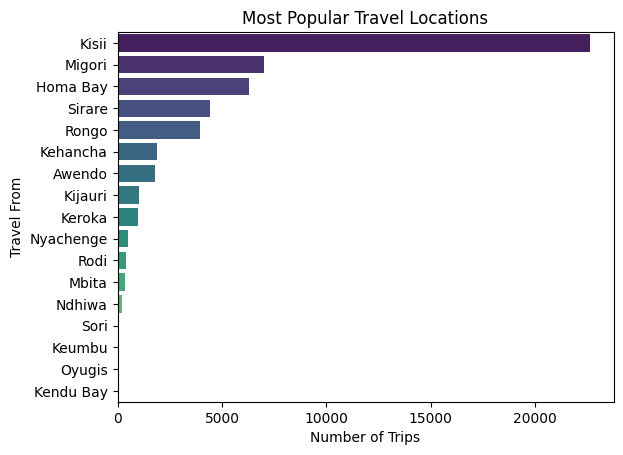

In [35]:
sns.countplot(y='travel_from', data=df, order=df['travel_from'].value_counts().index, palette='viridis')
plt.title('Most Popular Travel Locations')
plt.xlabel('Number of Trips')
plt.ylabel('Travel From')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_47556\3371058413.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='car_type', y='Tickets', data=df, palette='seismic')


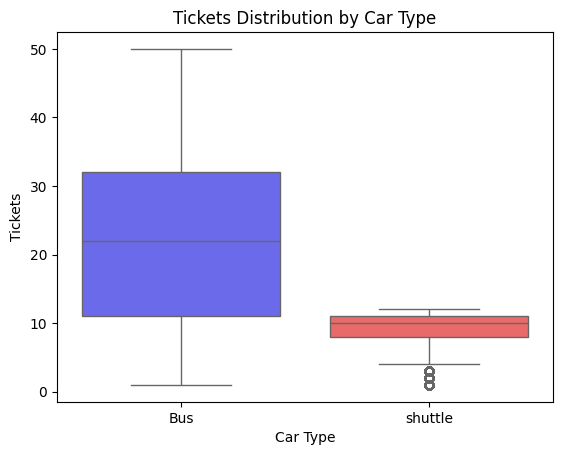

In [36]:
sns.boxplot(x='car_type', y='Tickets', data=df, palette='seismic')
plt.title('Tickets Distribution by Car Type')
plt.xlabel('Car Type')
plt.ylabel('Tickets')
plt.show()

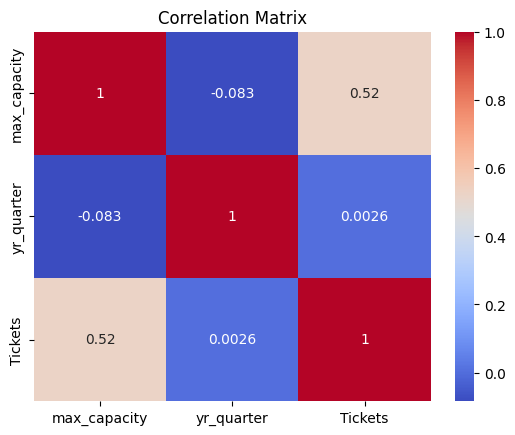

In [37]:
numerical_columns = ['max_capacity', 'yr_quarter', 'Tickets']
correlation_matrix = df[numerical_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Now that we have a good understanding of the dat, we can now encode the categorical variables in the dataset.

In [38]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
categorical_columns = ['seat_number', 'travel_from', 'car_type', 'payment_method', 'day_of_wk']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
    
df.head()

ride_id  seat_number  payment_method         travel_time  travel_from  \
0     1442           13               1 2017-10-17 07:15:00            9   
1     5437           11               1 2017-11-19 07:12:00            9   
2     5710           57               1 2017-11-26 07:05:00            4   
3     5777           21               1 2017-11-27 07:10:00            1   
4     5778            4               1 2017-11-27 07:12:00            9   

   car_type  max_capacity  yr_quarter  day_of_wk  Tickets  
0         0            49           4          5        1  
1         0            49           4          3        1  
2         0            49           4          3        1  
3         0            49           4          1        5  
4         0            49           4          1       31

In [39]:
# split the features and the target
X = df.drop(columns = ['Tickets','travel_time', 'ride_id'])
y = df['Tickets']

# perform a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Modelling

In [40]:
# Train the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)

print(mae)
print(rf_model.score(X_test, y_test))

5.728211493107121
0.5111224504514035


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='neg_mean_absolute_percentage_error')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

In [49]:
# instantiate the model
rf_model_1 = RandomForestRegressor(max_depth=12, min_samples_split=10, n_estimators = 100)

# fit the model to the training data
rf_model_1.fit(X_train, y_train)

# make prediction
y_pred = rf_model_1.predict(X_test)

# performance
mean_absolute_error(y_test, y_pred)

5.262687487010513

### Preparation of the submission file

In [50]:
# make predictions
number_of_tickets = rf_model_1.predict(X)

# submission dataframe
submission_df = pd.DataFrame(zip(ride_id, np.round(number_of_tickets)))
submission_df

0     1
0      1442  25.0
1      5437  27.0
2      5710   2.0
3      5777  28.0
4      5778  26.0
...     ...   ...
51650   247  17.0
51651   256   4.0
51652   275   2.0
51653   285   4.0
51654   286   2.0

[51655 rows x 2 columns]

In [51]:
# write into a csv file
submission_df.to_csv('submission.csv', index=False)